# **Problem Statement**
#### The objective of this report is to build a model that can best predict the risk of diabetes progression, given the body mass index  (BMI) feature in the dataset. This will be used as a screening tool to help physicians with identifying patients at risk.

# **Getting Data**

In [23]:
from sklearn import datasets
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [41]:
diabetes= datasets.load_diabetes( return_X_y = False, as_frame=True, scaled=False)
df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])

# **Exploratory Data Analysis**

## Explore Data

In [42]:
df_head = df.head()
print(df_head)

    age  sex   bmi     bp     s1     s2    s3   s4      s5    s6  target
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0   151.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0    75.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0   141.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0   206.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0   135.0


## Explore Statistics

In [43]:
df_stats = df.describe()
print(df_stats)

              age         sex         bmi          bp          s1          s2   
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000  \
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               s3          s4          s5          s6      target  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005 

## Visualization

### Histograms

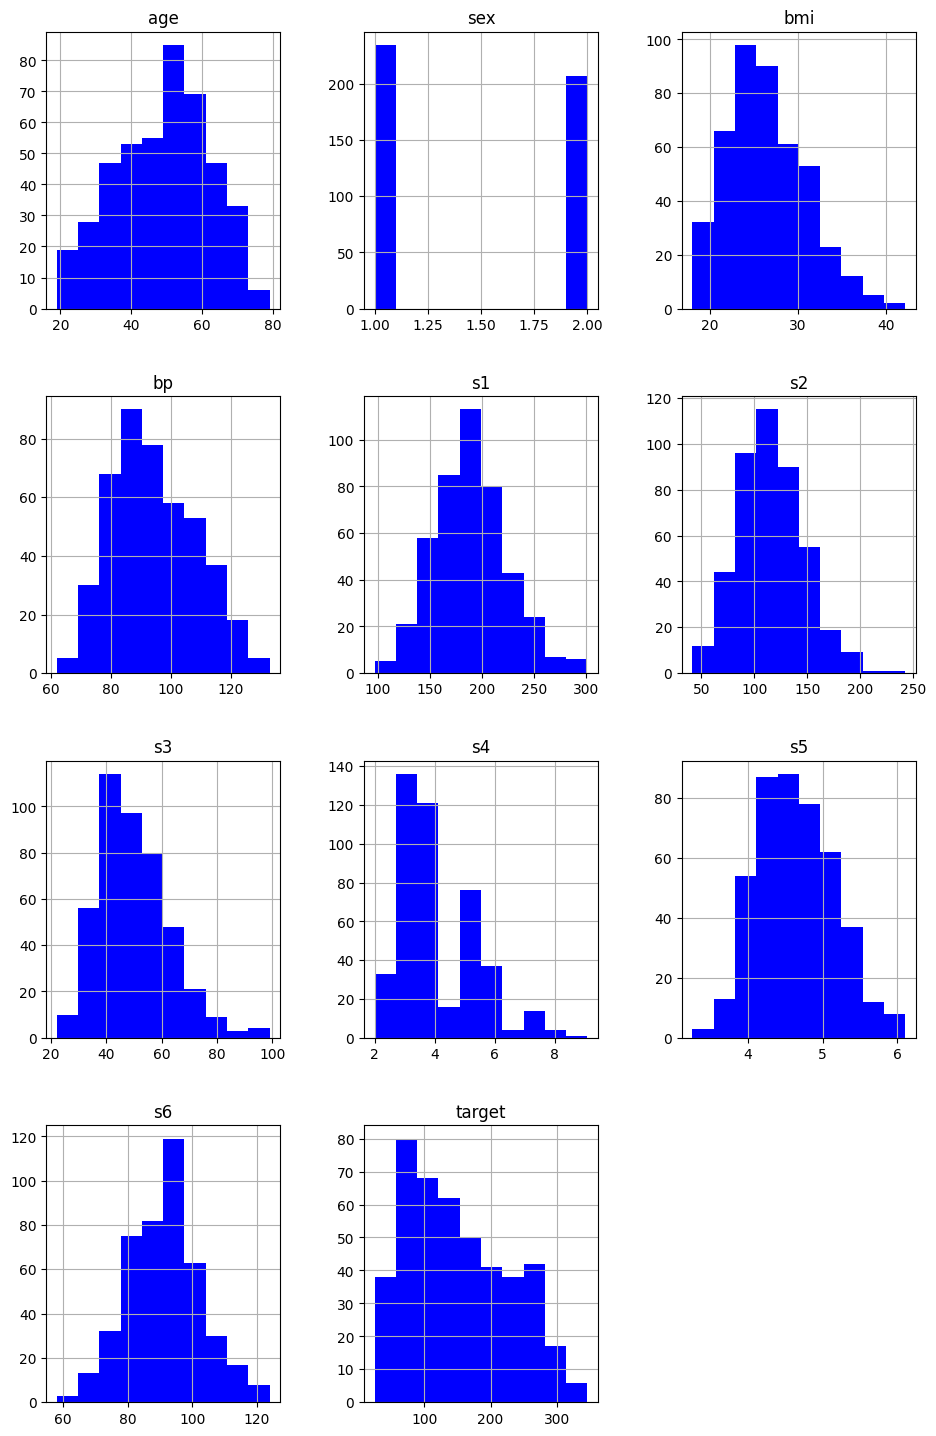

In [65]:
df.hist(figsize=(10, 15) , bins = 10 , color='blue') 
plt.tight_layout(pad=3.0)  
plt.show()

Observations :

 - BMI peaks around 26 so looks like higher no. of individuals in the dataset falls in the overweight category.
 - Dataset includes a different range of ages, with most individuals being around middle age.
 - Distribution of all other health-related variables appears to be normal
 
 

### Correlation Matrix 

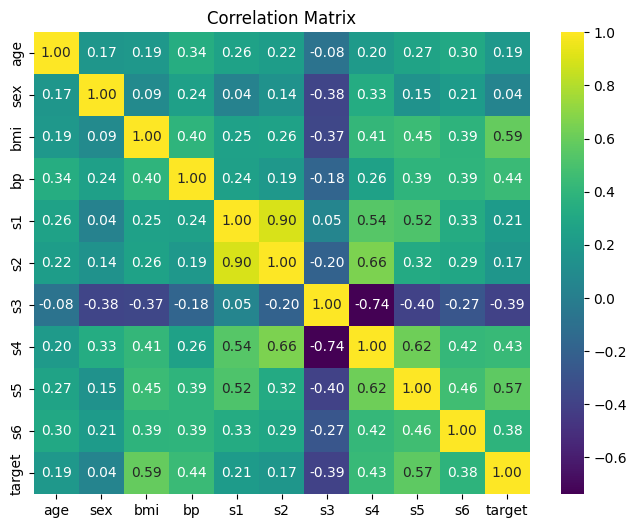

In [55]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Observations: 

- Strong positive correlation of .59 observed between BMI and the target variable . This suggests that as the BMI increases, the target variable will increase as well.

- Very Strong positive correlation of 0.90 between S1 and S2 . 

- Strong negative correlation of -0.74 between S3 and S4.

# **Data Cleaning** 

###  Observations based on EDA:

### - There are no missing values in the dataset as all features have a count of 442.
### - The minimum and maximum values of the features do not indicate any outliers.

### From the above observations , it seems that the data is clean and does not require any additional cleaning.


# **Data Split to Train, Test and Validation** 


In [29]:
X = df[["bmi"]]
y = df[["target"]]

train_ratio = .70
test_ratio = .15
validation_ratio = .15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42) 
X_train, X_val , y_train, y_val = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio), random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(308, 1)
(67, 1)
(67, 1)


# **Polynomial Regression**

Running a polynomial regression on the BMI feature versus the " disease progression one year after baseline" - from degree 0 to 5

Create 6 polynomial models, from degree 0 (constant) and up to a degree of 5:

In [30]:

degrees = [0, 1, 2, 3, 4, 5]
models = {}
for degree in degrees:
    polynomial_model = Pipeline([('polynomial',PolynomialFeatures(degree=degree)), ('linear', LinearRegression())])
    polynomial_model.fit(X = X_train, y = y_train)
    models[degree] = polynomial_model

print(models)
   


{0: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=0)),
                ('linear', LinearRegression())]), 1: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())]), 2: Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('linear', LinearRegression())]), 3: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())]), 4: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression())]), 5: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression())])}


Model status

In [31]:
for degree, model in models.items():
    print(f'Model: {model}')
    print(f'Coefficients: {model[-1].coef_[0][1:]}')
    print(f'Intercept: {model[-1].intercept_[0]}')
    # generate equation string:
    equation = f"y = {model[-1].intercept_[0]:.2f}"
    for ind, coeff in enumerate(model[-1].coef_[0][1:]):
        degree = ind + 1
        equation += f" + {coeff:.2f}x^{degree}"
    print(f'Equation: {equation}')
    print('***')

Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=0)),
                ('linear', LinearRegression())])
Coefficients: []
Intercept: 152.71753246753246
Equation: y = 152.72
***
Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())])
Coefficients: [11.10067804]
Intercept: -140.3872214091919
Equation: y = -140.39 + 11.10x^1
***
Model: Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('linear', LinearRegression())])
Coefficients: [6.55067953 0.08228092]
Intercept: -79.16332112544131
Equation: y = -79.16 + 6.55x^1 + 0.08x^2
***
Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])
Coefficients: [-2.64438331e+01  1.27191128e+00 -1.39701593e-02]
Intercept: 218.90298134701402
Equation: y = 218.90 + -26.44x^1 + 1.27x^2 + -0.01x^3
***
Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=4)),
                ('linear', LinearRe

## Report R-squared, MAPE and MAE for each model



In [32]:
 # Compare the models

for degree, model in models.items():
    
    # Training Set
    y_train_predict = model.predict(X_train)
    r2 = r2_score(y_train, y_train_predict)
    mae = mean_absolute_error(y_train, y_train_predict)
    mape = mean_absolute_percentage_error(y_train,y_train_predict)
    print(f"Training Data : ")
    print(f"Model: {degree}, R-squared: {r2}, MAE: {mae}, MAPE: {mape}")

    # Validation Set
    y_val_predict = model.predict(X_val)
    r2 = r2_score(y_val, y_val_predict)
    mae = mean_absolute_error(y_val, y_val_predict)
    mape = mean_absolute_percentage_error(y_val,y_val_predict)
    print(f"Validation Data : ")
    print(f"Model: {degree}, R-squared: {r2}, MAE: {mae}, MAPE: {mape}")

Training Data : 
Model: 0, R-squared: 0.0, MAE: 66.40995530443583, MAPE: 0.6329727836812871
Validation Data : 
Model: 0, R-squared: -0.0006839487574135106, MAE: 64.88936809459199, MAPE: 0.5965049668850388
Training Data : 
Model: 1, R-squared: 0.38424560656383255, MAE: 50.77732194761989, MAPE: 0.470128657171914
Validation Data : 
Model: 1, R-squared: 0.26986823936699667, MAE: 51.17449586889469, MAPE: 0.4663669230617471
Training Data : 
Model: 2, R-squared: 0.38494919755483314, MAE: 50.77579001430587, MAPE: 0.4698539357153514
Validation Data : 
Model: 2, R-squared: 0.2689988822707098, MAE: 51.00728234024037, MAPE: 0.46521784983850195
Training Data : 
Model: 3, R-squared: 0.3857345838831435, MAE: 50.672568995212345, MAPE: 0.4679261426636644
Validation Data : 
Model: 3, R-squared: 0.26299271426104487, MAE: 51.053310950921514, MAPE: 0.46461750312093525
Training Data : 
Model: 4, R-squared: 0.3889857605050755, MAE: 50.32030609284079, MAPE: 0.463442589580837
Validation Data : 
Model: 4, R-squ

# **Compare the polynomial models :**

| Data Type | Degree | R-squared | Mean Absolute Error | Mean Absolute Percentage Error |
| :---------| :---------:| :---------|:--------:|:---------:|
| **Training Data** | 0 | 0.0 | 66.40995530443583 | 0.6329727836812871 |
| **Validation Data** | 0 | -0.0006839487574135106 | 64.88936809459199 | 0.5965049668850388 |
| **Training Data** | 1 | 0.38424560656383255 | 50.77732194761989 | 0.470128657171914 |
| **Validation Data** | 1 | `0.26986823936699667` | 51.17449586889469 | 0.4663669230617471 |
| **Training Data** | 2 | 0.38494919755483314 | 50.77579001430587 | 0.4698539357153514 |
| **Validation Data** | 2 | 0.2689988822707098 | 51.00728234024037 | 0.46521784983850195 |
| **Training Data** | 3 | 0.3857345838831435 | 50.672568995212345 | 0.4679261426636644 |
| **Validation Data** | 3 | 0.26299271426104487 | 51.053310950921514 | 0.46461750312093525 |
| **Training Data** | 4 | 0.3889857605050755 | 50.32030609284079 | 0.463442589580837 |
| **Validation Data** | 4 | 0.26354405465929964 | 51.234054090571696 | 0.46242986675400083 |
| **Training Data** | 5 | 0.39018303744284144 | 50.196982710460475 | 0.4620188973386838 |
| **Validation Data** | 5 | 0.26576772663994896 | 51.29890013023524 | `0.4623113117300606` |


## **Conclusion**

Based on the performace metrics R-squared , MAE and MAPE from all 6 models

The model with degree 1 has the highest R-squared value on the validation set although the difference in R-squared values between the models is small.
Also noted that the model with degree 5 has the lowest Mean Absolute Percentage Error (MAPE) on the validation set.

We will choose the model with highest R-squared value which is of degree = 1 as more complex models  might fit the training data very well, but they can also overfit to the noise in the data and perform poorly on new data




In [33]:
polynomial_model_chosen = Pipeline([('polynomial',PolynomialFeatures(degree=1)), ('linear', LinearRegression())])
polynomial_model_chosen.fit(X = X_train, y = y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())])

## Run the chosen model on the test set

In [34]:
y_test_predict = polynomial_model_chosen.predict(X_test)

r2 = r2_score(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
mape = mean_absolute_percentage_error(y_test,y_test_predict)
print(f"Degree: {1}, R-squared: {r2}, MAE: {mae}, MAPE: {mape}")
print(f'Model: {polynomial_model_chosen}')
print(f'Coefficients: {polynomial_model_chosen[-1].coef_[0][1:]}')
print(f'Intercept: {polynomial_model_chosen[-1].intercept_[0]}')

Degree: 1, R-squared: 0.19596673323322866, MAE: 54.926929034510714, MAPE: 0.48337492893901357
Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())])
Coefficients: [11.10067804]
Intercept: -140.3872214091919


## Plot graph of the train, validation and test datapoints, and the fit of the chosen model

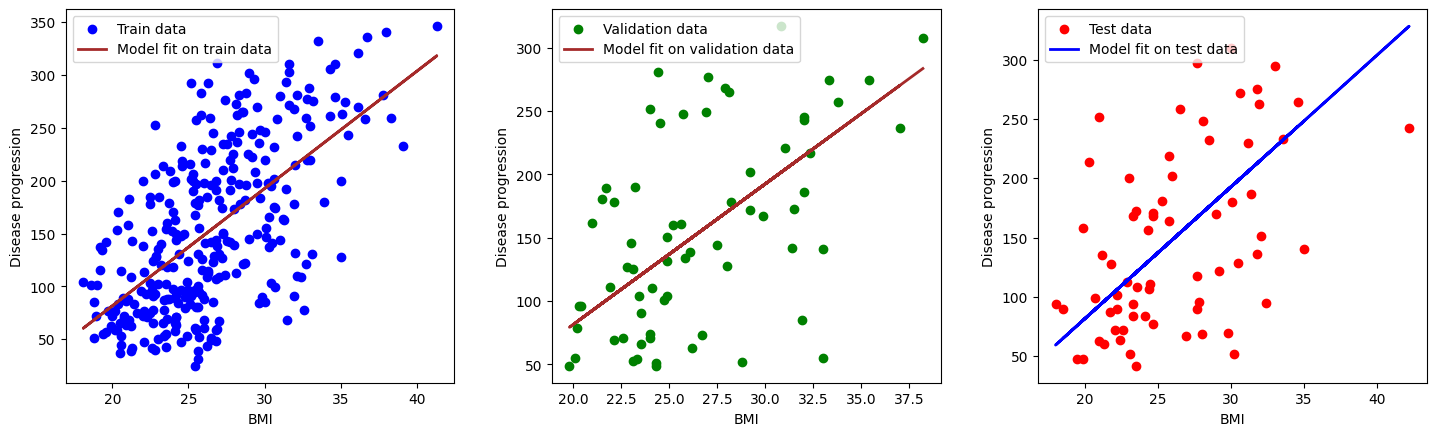

In [45]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
y_train_predict = polynomial_model_chosen.predict(X_train)
y_val_predict = polynomial_model_chosen.predict(X_val)

# Plot the datapoints and the model fit for train set
axs[0].scatter(X_train, y_train, color='blue', label='Train data')
axs[0].plot(X_train, y_train_predict, color='brown', linewidth=2, label='Model fit on train data')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Disease progression')
axs[0].legend()

# Plot the datapoints and the model fit for validation set
axs[1].scatter(X_val, y_val, color='green', label='Validation data')
axs[1].plot(X_val, y_val_predict, color='brown', linewidth=2, label='Model fit on validation data')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Disease progression')
axs[1].legend()

# Plot the datapoints and the model fit for test set
axs[2].scatter(X_test, y_test, color='red', label='Test data')
axs[2].plot(X_test, y_test_predict, color='blue', linewidth=2, label='Model fit on test data')
axs[2].set_xlabel('BMI')
axs[2].set_ylabel('Disease progression')
axs[2].legend()

# Display the plots
plt.tight_layout(pad=3.0)
plt.show()

## Best fit model

In [36]:
bmi_value = np.array([[28]])
disease_progression = polynomial_model_chosen.predict(bmi_value)
print(disease_progression)

[[170.43176383]]


d:\Jency\Class Work\AI and Machine Learning\Foundations of Machine Learning Frameworks\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(



Model predicts the progression of diabetes based on a patient’s BMI. 

Based on the model intercept -140.38  and coeffecient 11.10 , for each unit increase in BMI, the model predicts an increase of 11.10 units in the diabetes progression measure.

For example, for a patient with a BMI of 28, model predicts a diabetes progression measure of 170.42. The accuracy of the model is verified by comparing its predictions with manual calculations, and the results are very close. 

Equation: y = -140.38 + 11.10 * bmi

Manual Calculation for bmi = 28 , 
y = -140.38 + 11.10 * 28
= 170.42


## **Trainable parameters:**

In [37]:
degrees = [0, 1, 2, 3, 4, 5]
for degree in degrees:
    polynomial_model = PolynomialFeatures(degree=degree)
    polynomial_model.fit_transform(X)
    print(polynomial_model.get_feature_names_out())


['1']
['1' 'bmi']
['1' 'bmi' 'bmi^2']
['1' 'bmi' 'bmi^2' 'bmi^3']
['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4']
['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']


The trainable parameters for each model are:


| Degree | Polynomial | Number of Parameters | Parameters |
| :----- | :------------------------------------- | :------------: | :----------------- |
| 0 | $y = w_0$ | 1 | $w_0$ |
| 1 | $y = w_0 + w_1  \times bmi$ | 2 | $w_0, w_1$ |
| 2 | $y = w_0 + w_1 \times bmi + w_2 \times \text{bmi}^2$ | 3 | $w_0, w_1, w_2$ |
| 3 | $y = w_0 + w_1 \times \text{bmi} + w_2 \times \text{bmi}^2 + w_3 \times \text{bmi}^3$ | 4 | $w_0, w_1, w_2, w_3$ |
| 4 | $y = w_0 + w_1 \times \text{bmi} + w_2 \times \text{bmi}^2 + w_3 \times \text{bmi}^3 + w_4 \times \text{bmi}^4$ | 5 | $w_0, w_1, w_2, w_3, w_4$ |
| 5 | $y = w_0 + w_1 \times \text{bmi} + w_2 \times \text{bmi}^2 + w_3 \times \text{bmi}^3 + w_4 \times \text{bmi}^4 + w_5 \times \text{bmi}^5$ | 6 | $w_0, w_1, w_2, w_3, w_4, w_5$|
